In [1]:
# load dataset
import pandas as pd
data = pd.read_csv('Customers.csv')
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
155,156,Female,27,78,89
74,75,Male,59,54,47
128,129,Male,59,71,11
45,46,Female,24,39,65
57,58,Male,69,44,46


In [2]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]

# rename names of columns for simplicity
data = data.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

data.sample(5)

,income,score
85,54,46
68,48,59
129,71,75
8,19,3
11,19,99


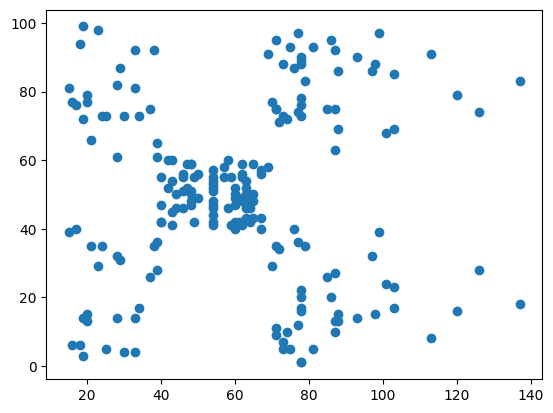

In [3]:
# visualize the data distribution
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [4]:
# calculate sum of squares errors for different K values
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

In [5]:
# sum of squares error for K=1 to k=10
wcss_error

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 37271.88623658949,
 31605.868380230888,
 26688.210341672846,
 24665.725975301582,
 21414.730474697724]

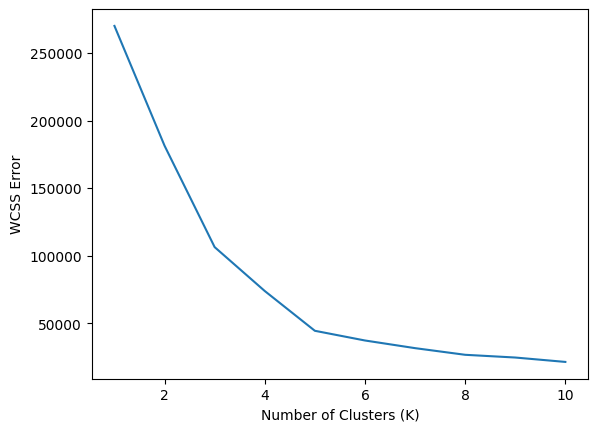

In [6]:
# plot WCSS error corresponding to different K values
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS Error')
plt.plot(k_values, wcss_error)

In [25]:
# train model using k=5
model = KMeans(n_clusters=5)
pred = model.fit_predict(data[['income','score']])

In [26]:
# see predicted clusters
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [27]:
# add cluster column to dataset
data['cluster'] = pred

In [28]:
data.sample(5)

,income,score,cluster
83,54,44,2
129,71,75,0
72,50,49,2
81,54,55,2
153,78,76,0


In [29]:
# centers of clusters
model.cluster_centers_

array([[86.53846154, 82.12820513],
       [87.75      , 17.58333333],
       [55.0875    , 49.7125    ],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

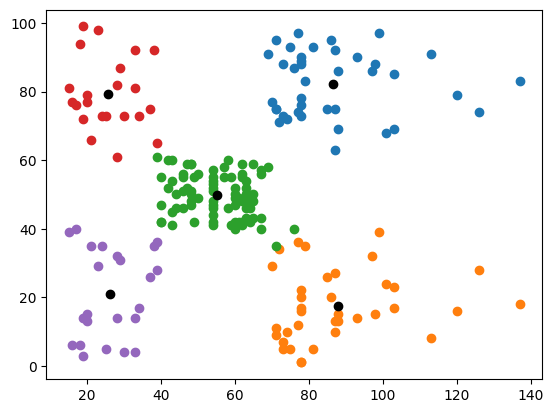

In [30]:
# visualize clusted data

cluster1 = data[data['cluster']==0]
plt.scatter(cluster1['income'], cluster1['score'])

cluster2 = data[data['cluster']==1]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==2]
plt.scatter(cluster3['income'], cluster3['score'])

cluster2 = data[data['cluster']==3]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==4]
plt.scatter(cluster3['income'], cluster3['score'])

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')